X[z]: 
  z   
──────
-a + z

 F[z]:
         2    3    4    5    6               
    a   a    a    a    a    a     ⎛1        ⎞
1 + ─ + ── + ── + ── + ── + ── + O⎜──; z → ∞⎟
    z    2    3    4    5    6    ⎜ 7       ⎟
        z    z    z    z    z     ⎝z        ⎠
Términos x[n] entre[0,7]
[1, a, a**2, a**3, a**4, a**5, a**6]

 x[n] con a= 1/2
[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]


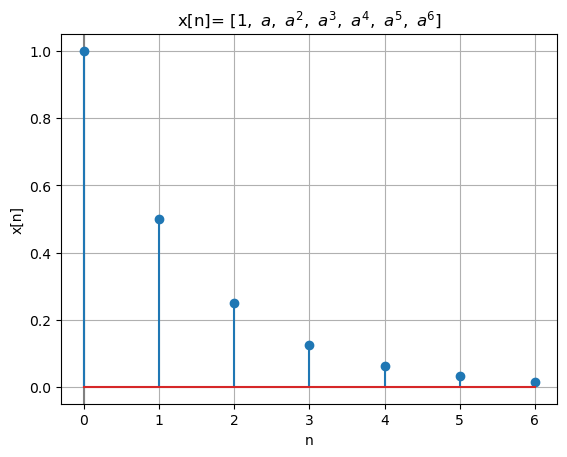

In [3]:
# transformada z inversa de X[z]
# supone que la expresión son fracciones parciales
import sympy as sym

# INGRESO
z = sym.symbols('z')
n = sym.symbols('n', integer=True, positive=True)
a = sym.symbols('a')

Xz = z/(z-a)

# valor a como racional en dominio 'ZZ' enteros
a_k = sym.Rational(1/2).limit_denominator(100)

m = 7   # Términos a graficar

# PROCEDIMIENTO
# expresión Xz con z para aplicar serie
# separa numerador y denominador
[Pz,Qz] = Xz.as_numer_denom()
Pz = (Pz*(1/z)).expand(1/z)
Qz = (Qz*(1/z)).expand(1/z)

# cambia Z por 1/z
Z = sym.symbols('Z')
PZ = Pz.subs(1/z,Z)
QZ = Qz.subs(1/z,Z)
XZ = PZ/QZ

# Series de potencia de Z
FZ = sym.series(XZ,Z, n=m)
Fz = FZ.subs(Z,1/z) # restituye 1/z

# Terminos de X[n]
xn = []
termino = Fz.args
for i in range(0,m,1):
    xn.append(termino[i]*(z**i))

# SALIDA
print('X[z]: ')
sym.pprint(Xz)
print('\n F[z]:')
sym.pprint(Fz)
print('Términos x[n] entre[0,'+str(m)+']')
print(xn)

# GRAFICA valores ---------------
import numpy as np
import matplotlib.pyplot as plt
# Terminos de X[n]
xi = [] ; ki=[]
for i in range(0,m,1):
    valor = xn[i].subs({z:1,a:a_k})
    xi.append(float(valor))
    ki.append(i)

print('\n x[n] con a=',a_k)
print(xi)

# grafica entrada x[n]
plt.axvline(0,color='grey')

plt.stem(ki,xi,label='x[n]')

plt.xlabel('n')
plt.ylabel('x[n]')
plt.title(r'x[n]= $'+str(sym.latex(xn))+'$')
plt.grid()

plt.show()